In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Reading the dataset

In [2]:
data=pd.read_excel('iris.xls')

# 2)Pre-processing

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Handling missing values

In [10]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

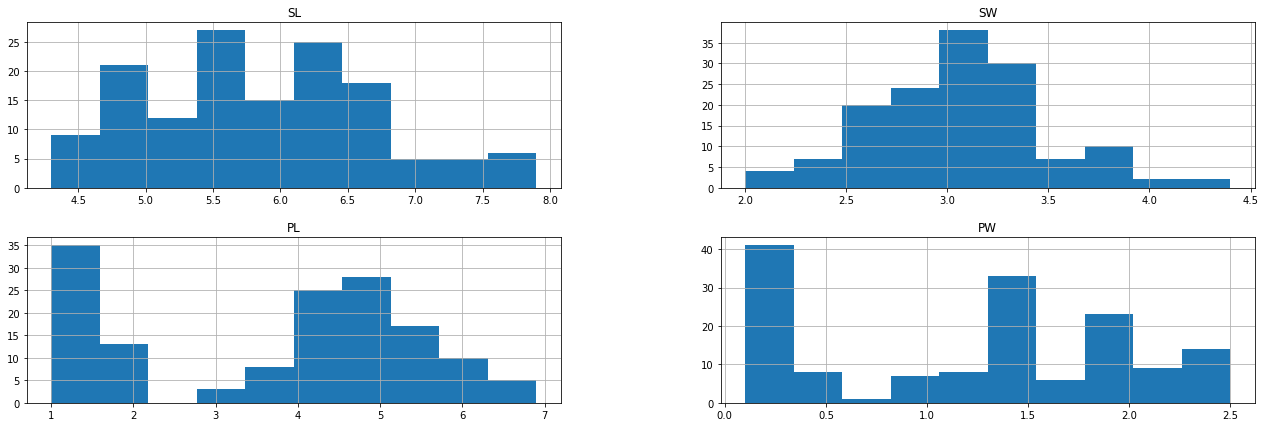

In [13]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(22,7))


Since all feature values are skewed we will fill the missing values with median

In [14]:
data['PL']=data['PL'].fillna(data['PL'].median())

In [15]:
data['SL']=data['SL'].fillna(data['SL'].median())

In [16]:
data['SW']=data['SW'].fillna(data['SW'].median())

In [17]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
#Handling Outliers

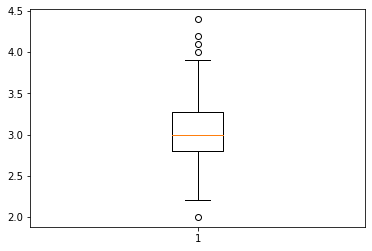

In [18]:
#boxplot of 'SW'
plt.boxplot(data['SW'])
plt.show()

In [20]:
#calculating percentiles
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)

#calculating inter quartile range
IQR=Q3-Q1
print('IQR = ',round(IQR,2))

#calculating the upper and lower limit of outliers
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',round(up_lim,2),'\nLower limit = ',round(low_lim,2))

#creating a list of outliers
outlier=[]
for x in data['SW']:
    if (x>up_lim or x<low_lim):
        outlier.append(x)
print('List of outliers: ',outlier)

Q1 =  2.8 
Q2 =  3.0 
Q3 =  3.25
IQR =  0.45
Upper limit =  3.92 
Lower limit =  2.12
List of outliers:  [4.0, 4.4, 4.1, 4.2, 2.0]


In [21]:
#finding index value
data.loc[(data['SW']>up_lim ) | (data['SW']<low_lim)].index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [22]:
data.drop([ 14, 15, 32, 33, 60],inplace=True)

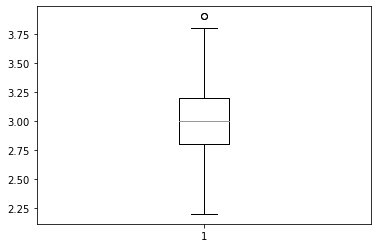

In [23]:
plt.boxplot(data['SW'])
plt.show()

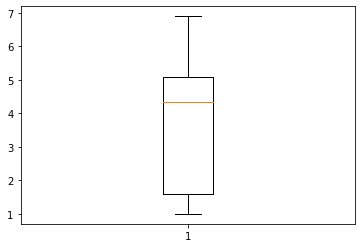

In [24]:
#boxplot of 'PL'
plt.boxplot(data['PL'])
plt.show()

In [25]:
#calculating percentiles
Q1=np.percentile(data['PL'],25,interpolation='midpoint')
Q2=np.percentile(data['PL'],50,interpolation='midpoint')
Q3=np.percentile(data['PL'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)

#calculating inter quartile range
IQR=Q3-Q1
print('IQR = ',round(IQR,2))

#calculating the upper and lower limit of outliers
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',round(up_lim,2),'\nLower limit = ',round(low_lim,2))

#creating a list of outliers
outlier=[]
for x in data['PL']:
    if (x>up_lim or x<low_lim):
        outlier.append(x)
print('List of outliers: ',outlier)

Q1 =  1.6 
Q2 =  4.35 
Q3 =  5.1
IQR =  3.5
Upper limit =  10.35 
Lower limit =  -3.65
List of outliers:  []


There are no outliers in PL 

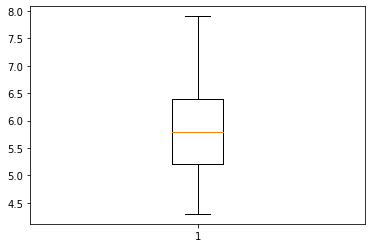

In [26]:
#boxplot of 'SL'
plt.boxplot(data['SL'])
plt.show()


In [27]:
#calculating percentiles
Q1=np.percentile(data['SL'],25,interpolation='midpoint')
Q2=np.percentile(data['SL'],50,interpolation='midpoint')
Q3=np.percentile(data['SL'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)

#calculating inter quartile range
IQR=Q3-Q1
print('IQR = ',round(IQR,2))

#calculating the upper and lower limit of outliers
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',round(up_lim,2),'\nLower limit = ',low_lim)

#creating a list of outliers
outlier=[]
for x in data['SL']:
    if (x>up_lim or x<low_lim):
        outlier.append(x)
print('List of outliers: ',outlier)


Q1 =  5.2 
Q2 =  5.8 
Q3 =  6.4
IQR =  1.2
Upper limit =  8.2 
Lower limit =  3.4
List of outliers:  []


There are no outliers in SL

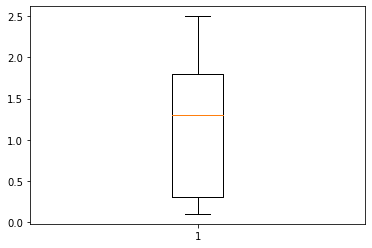

In [28]:
#boxplot of 'PW'
plt.boxplot(data['PW'])
plt.show()


In [29]:
#calculating percentiles
Q1=np.percentile(data['PW'],25,interpolation='midpoint')
Q2=np.percentile(data['PW'],50,interpolation='midpoint')
Q3=np.percentile(data['PW'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)

#calculating inter quartile range
IQR=Q3-Q1
print('IQR = ',round(IQR,2))

#calculating the upper and lower limit of outliers
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',round(up_lim,2),'\nLower limit = ',round(low_lim,2))

#creating a list of outliers
outlier=[]
for x in data['PW']:
    if (x>up_lim or x<low_lim):
        outlier.append(x)
print('List of outliers: ',outlier)


Q1 =  0.3 
Q2 =  1.3 
Q3 =  1.8
IQR =  1.5
Upper limit =  4.05 
Lower limit =  -1.95
List of outliers:  []


No outliers in PW

# Finding the ML Model with highest accuracy

In [30]:
y=data['Classification']

x=data.drop(['Classification'],axis=1)

In [31]:
from sklearn import preprocessing
x=preprocessing.normalize(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3
count,145.000000,145.000000,145.000000,145.000000
mean,0.750558,0.397703,0.465043,0.144106
std,0.048136,0.097243,0.154637,0.077887
min,0.631396,0.238392,0.168646,0.016695
25%,0.713666,0.325894,0.262330,0.051382
50%,0.747142,0.354212,0.539660,0.164742
75%,0.788928,0.507020,0.582878,0.197997
max,0.860939,0.607125,0.636981,0.280419


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [33]:
#Logistic regression  Model
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [34]:
#Rating the Accuracy 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  4  5]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.44      0.62         9
 Iris-virginica       0.69      1.00      0.81        11

       accuracy                           0.83        29
      macro avg       0.90      0.81      0.81        29
   weighted avg       0.88      0.83      0.81        29



In [35]:
#Support Vector Machine
from sklearn.svm import SVC
svm_linear=SVC(kernel='rbf')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [36]:
#Rating the accuracy
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        29
      macro avg       0.97      0.96      0.97        29
   weighted avg       0.97      0.97      0.97        29



In [37]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [38]:
#Rating the accuracy
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  7  2]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        29
      macro avg       0.95      0.93      0.93        29
   weighted avg       0.94      0.93      0.93        29



In [39]:
#RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [40]:
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        29
      macro avg       0.97      0.96      0.97        29
   weighted avg       0.97      0.97      0.97        29



Out of the 4 models Random Forest Model and Support Vector Machine gave the highest accuracy of 0.97 where as Decision Tree gave an accuracy of 0.93 and Logistic regression has the lowest accuracy of 0.83 .